In [1]:
using CSV, DataFrames, Query, Dates, Statistics, Gadfly, Distributions, StatsPlots

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly C:\Users\user\.julia\packages\Gadfly\09PWZ\src\mapping.jl:228


In [2]:
data = CSV.read("water.csv")
data = data |>
    @filter(_.水溫 != "#VALUE!") |>
    @filter(_.氫離子濃度指標 != "#VALUE!") |>
    DataFrame

data.日期 = Date.(data.日期, "yyyy/mm/dd")
data.氫離子濃度指標 = parse.(Float64, data.氫離子濃度指標)
data.水溫 = parse.(Float64, data.水溫)
# 將導電度控制在25°C下 (每上升1°C, 導電度約上升2%)
data.導電度 = data.導電度 .* (1.02).^(25 .- data.水溫)
data

,日期,廠名,導電度,氫離子濃度指標,水溫
,Date,String,Float64,Float64,Float64
1,2017-01-01,觀音,6126.7,7.1,27.8
2,2017-01-02,觀音,6367.2,7.2,24.4
3,2017-01-03,觀音,5772.53,7.2,26.8
4,2017-01-04,觀音,5822.92,7.0,28.8
5,2017-01-05,觀音,5824.17,6.9,29.5
6,2017-01-06,觀音,5938.8,6.9,29.8
7,2017-01-07,觀音,6002.55,6.9,30.4
8,2017-01-08,觀音,5342.09,6.8,30.4
9,2017-01-09,觀音,5286.18,6.8,28.2


In [3]:
data |>
    @groupby(_.廠名) |>
    @map({v1 = key(_), v2 = size(_, 1)}) |>
    @orderby_descending(_.v2)

v1,v2
"""觀音""",318
"""大武崙""",277
"""台中""",270
"""安平""",269
"""全興""",269
"""斗六""",268
"""新營""",268
"""大甲幼獅""",268
"""臨海""",267
"""台南科技""",266


In [4]:
# 基隆大武崙
df = data |>
    @filter(_.廠名 == "大武崙") |>
    DataFrame


df

,日期,廠名,導電度,氫離子濃度指標,水溫
,Date,String,Float64,Float64,Float64
1,2017-03-02,大武崙,863.249,7.6,18.7
2,2017-03-03,大武崙,1018.51,7.5,19.2
3,2017-03-04,大武崙,566.424,7.4,19.8
4,2017-03-05,大武崙,481.529,7.4,20.1
5,2017-03-06,大武崙,359.017,7.4,16.6
6,2017-03-07,大武崙,366.197,7.4,15.6
7,2017-03-08,大武崙,382.405,7.5,14.4
8,2017-03-09,大武崙,380.497,7.7,15.3
9,2017-03-10,大武崙,573.194,7.9,18.0


In [153]:
xbb = 0
rb = 0
r = []
xb = []
for m in 1:25
    append!(xb, mean(df.導電度[7(m-1) .+ collect(1:7)]))
    append!(r, maximum(df.導電度[7(m-1) .+ collect(1:7)]) - minimum(df.導電度[7(m-1) .+ collect(1:7)]))
    xbb += xb[m]/25
    rb += r[m]/25
end
xbb,rb

(1406.0518488883372, 841.7141561795763)

In [154]:
# phase1 rb1
p1 = Gadfly.plot(
    layer(x = 1:25, y = r, Geom.point, Geom.line),
    layer(yintercept = [rb, 0.076rb, 1.924rb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("rbar1.svg", 6inch, 4inch), p1)

false

In [155]:
# phase1 xb1
p2 = Gadfly.plot(
    layer(x = 1:25, y = xb, Geom.point, Geom.line),
    layer(yintercept = [xbb, xbb + 0.419rb, xbb - 0.419rb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("xbar1.svg", 6inch, 4inch), p2)

false

In [156]:
i = 0
xbb = 0
rb = 0
r = []
xb = []
for m in deleteat!(collect(1:25), [1,2,15,19,20,23])
    i += 1
    append!(xb, mean(df.導電度[7(m-1) .+ collect(1:7)]))
    append!(r, maximum(df.導電度[7(m-1) .+ collect(1:7)]) - minimum(df.導電度[7(m-1) .+ collect(1:7)]))
    xbb += xb[i]/19
    rb += r[i]/19
end
xbb,rb

(1511.7930624013854, 878.6226278892873)

In [157]:
# phase1 rb2
p1 = Gadfly.plot(
    layer(x = deleteat!(collect(1:25), [1,2,15,19,20,23]), y = r, Geom.point, Geom.line),
    layer(yintercept = [rb, 0.076rb, 1.924rb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("rbar2.svg", 6inch, 4inch), p1)

false

In [158]:
p2 = Gadfly.plot(
    layer(x = deleteat!(collect(1:25), [1,2,15,19,20,23]), y = xb, Geom.point, Geom.line),
    layer(yintercept = [xbb, xbb + 0.419rb, xbb - 0.419rb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("xbar2.svg", 6inch, 4inch), p2)

false

In [161]:
# plot(x = sort(df.導電度[1:25]), y = Normal(mean(df.導電度[1:25]), std(df.導電度[1:25])), Stat.qq, Geom.point)
p12 = qqnorm(df.導電度[deleteat!(collect(1:25), [1,2,15,19,20,23])], qqline = :R)
savefig("qq")

In [162]:
new_xb = []
new_r = []
for m in 26:39
    append!(new_xb, mean(df.導電度[7(m-1) .+ collect(1:7)]))
    append!(new_r, maximum(df.導電度[7(m-1) .+ collect(1:7)]) - minimum(df.導電度[7(m-1) .+ collect(1:7)]))
end

In [163]:
p3 = Gadfly.plot(
    layer(x = 1:14, y = new_r, Geom.point, Geom.line),
    layer(yintercept = [rb, 0.076rb, 1.924rb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("rbar3.svg", 6inch, 4inch), p3)

false

In [164]:
p4 = Gadfly.plot(
    layer(x = 1:14, y = new_xb, Geom.point, Geom.line),
    layer(yintercept = [xbb, xbb + 0.419rb, xbb - 0.419rb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("xbar3.svg", 6inch, 4inch), p4)

false

In [165]:
xbb = 0
sb = 0
s = []
xb = []
for m in 1:25
    append!(xb, mean(df.導電度[7(m-1) .+ collect(1:7)]))
    append!(s, std(df.導電度[7(m-1) .+ collect(1:7)]))
    xbb += xb[m]/25
    sb += s[m]/25
end
xbb,sb

(1406.0518488883372, 302.1556803290977)

In [166]:
# phase1 sb1
p5 = Gadfly.plot(
    layer(x = 1:25, y = s, Geom.point, Geom.line),
    layer(yintercept = [sb, 0.118sb, 1.882sb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("sbar4.svg", 6inch, 4inch), p5)

false

In [167]:
# phase1 xb1
p6 = Gadfly.plot(
    layer(x = 1:25, y = xb, Geom.point, Geom.line),
    layer(yintercept = [xbb, xbb + 1.182sb, xbb - 1.182sb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("xbar4.svg", 6inch, 4inch), p6)

false

In [168]:
i = 0
xbb = 0
sb = 0
s = []
xb = []
for m in deleteat!(collect(1:25), [1,2,15,19,20,23])
    i += 1
    append!(xb, mean(df.導電度[7(m-1) .+ collect(1:7)]))
    append!(s, std(df.導電度[7(m-1) .+ collect(1:7)]))
    xbb += xb[i]/19
    sb += s[i]/19
end
xbb,sb

(1511.7930624013854, 312.8631614020924)

In [169]:
# phase1 sb2
p7 = Gadfly.plot(
    layer(x = deleteat!(collect(1:25), [1,2,15,19,20,23]), y = s, Geom.point, Geom.line),
    layer(yintercept = [sb, 0.118sb, 1.882sb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("sbar5.svg", 6inch, 4inch), p7)

false

In [170]:
# phase1 xb2
p8 = Gadfly.plot(
    layer(x = deleteat!(collect(1:25), [1,2,15,19,20,23]), y = xb, Geom.point, Geom.line),
    layer(yintercept = [xbb, xbb + 1.182sb, xbb - 1.182sb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("xbar5.svg", 6inch, 4inch), p8)

false

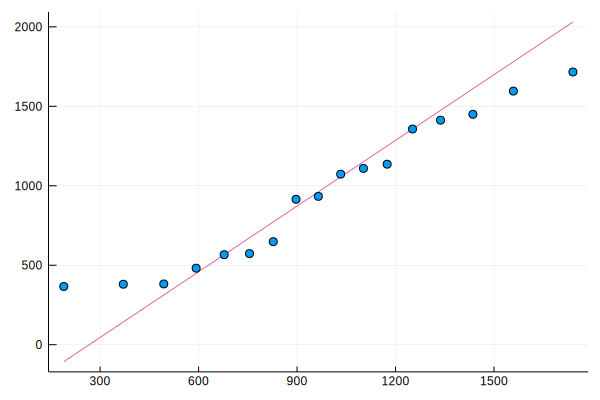

In [115]:
qqnorm(df.導電度[deleteat!(collect(1:25), [1,2,15,19,20,23])], qqline = :R)

In [171]:
new_xb = []
new_s = []
for m in 26:39
    append!(new_xb, mean(df.導電度[7(m-1) .+ collect(1:7)]))
    append!(new_s, std(df.導電度[7(m-1) .+ collect(1:7)]))
end

In [172]:
# phase2 sb
p9 = Gadfly.plot(
    layer(x = 1:14, y = new_s, Geom.point, Geom.line),
    layer(yintercept = [sb, 0.118sb, 1.882sb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("sbar6.svg", 6inch, 4inch), p9)

false

In [173]:
# phase2 xb
p10 = Gadfly.plot(
    layer(x = 1:14, y = new_xb, Geom.point, Geom.line),
    layer(yintercept = [xbb, xbb + 1.182sb, xbb - 1.182sb], Geom.hline(color = "red", style = :dot))
)
draw(SVG("xbar6.svg", 6inch, 4inch), p10)

false

In [6]:
df2 = data |>
    @groupby(_.廠名) |>
    @map({v1 = key(_), v2 = mean(_.導電度)}) |>
    DataFrame
#=
df2.v2 = df2.v2 ./ sum(df2.v2)
df2 = df2 |>
    @orderby_descending(_.v2) |>
    DataFrame
df2.v3 = cumsum(df2.v2);
=#

df2.v2 = df2.v2 ./ sum(df2.v2)
df2 = df2 |>
    @orderby_descending(_.v2) |>
    DataFrame
df2.v3 = cumsum(df2.v2);
df2


,v1,v2,v3
,String,Float64,Float64
1,大發,0.0631227,0.0631227
2,永安,0.0612302,0.124353
3,林園,0.0586608,0.183014
4,台南科技,0.0585395,0.241553
5,臨海,0.0562888,0.297842
6,大甲幼獅,0.0535316,0.351374
7,屏南,0.0520009,0.403375
8,觀音,0.0469048,0.450279
9,新營,0.0448217,0.495101


In [8]:
p11 = Gadfly.plot(
    layer(x = append!(df2.v1[1:9], ["Others"]), y = append!(df2.v2[1:9], sum(df2.v2[10:34])), Geom.bar),
    layer(x = append!(df2.v1[1:9], ["Others"]), y = append!(df2.v3[1:9], 1), Geom.point, Geom.line)
)
draw(SVG("pareto.svg", 6inch, 4inch), p11)

false

In [130]:
function m(x)
    if x in df2.v1[1:7]
        return x
    else
        return "Others"
    end
end
data.廠名2 = m.(data.廠名)
data

,日期,廠名,導電度,氫離子濃度指標,水溫,廠名2
,Date,String,Float64,Float64,Float64,String
1,2017-01-01,觀音,6126.7,7.1,27.8,觀音
2,2017-01-02,觀音,6367.2,7.2,24.4,觀音
3,2017-01-03,觀音,5772.53,7.2,26.8,觀音
4,2017-01-04,觀音,5822.92,7.0,28.8,觀音
5,2017-01-05,觀音,5824.17,6.9,29.5,觀音
6,2017-01-06,觀音,5938.8,6.9,29.8,觀音
7,2017-01-07,觀音,6002.55,6.9,30.4,觀音
8,2017-01-08,觀音,5342.09,6.8,30.4,觀音
9,2017-01-09,觀音,5286.18,6.8,28.2,觀音


In [185]:
(xbb, sb) = (1511.7930624013854, 312.8631614020924)
[sb, 0.118sb, 1.882sb],
[xbb, xbb + 1.182sb, xbb - 1.182sb]

([312.8631614020924, 36.9178530454469, 588.8084697587378], [1511.7930624013854, 1881.5973191786586, 1141.9888056241123])